My first Data Science project all by myself. Exciting!

In [18]:
import os
os.environ['SCIPY_ARRAY_API'] = '1'

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [20]:
loan = pd.read_csv("../data/input/loan.csv")

Finding out whether to use Mean or Median for our Numerical Columns

Text(0.5, 0, 'Applicant Income')

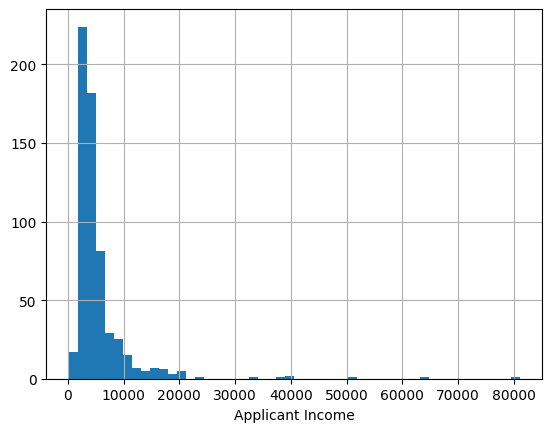

In [21]:
loan["ApplicantIncome"].hist(bins=50)
plt.xlabel("Applicant Income")

Text(0.5, 0, 'Coapplicant Income')

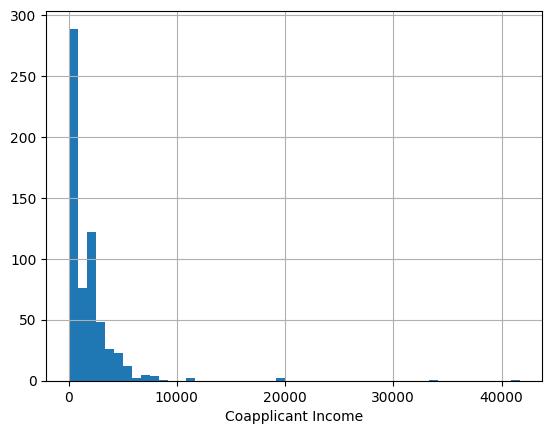

In [22]:
loan["CoapplicantIncome"].hist(bins=50)
plt.xlabel("Coapplicant Income")

Applicant Income and Coapplicant Income are both right skewed for this reason i will use median.

Text(0.5, 0, 'Loan Amount')

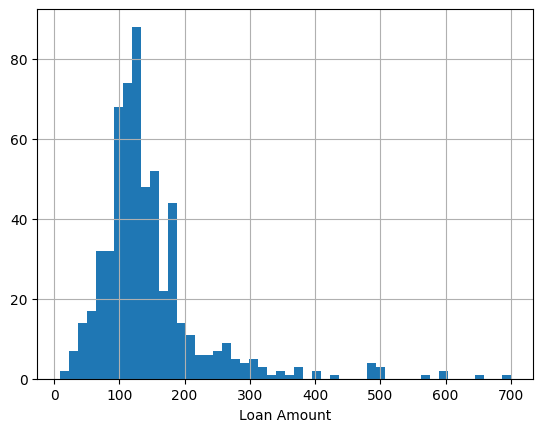

In [23]:
loan["LoanAmount"].hist(bins=50)
plt.xlabel("Loan Amount")

It is also a right skewed, i use median.

Text(0.5, 0, 'Loan Amount Term')

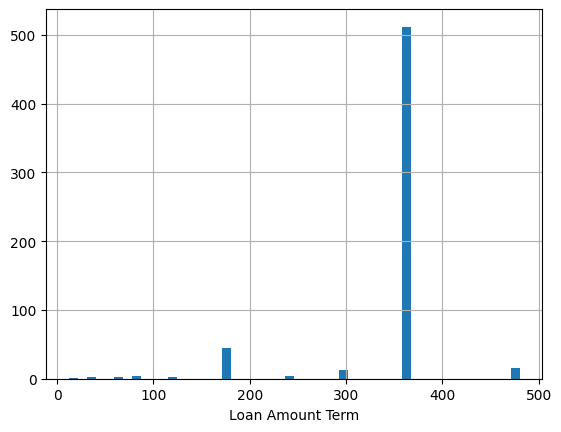

In [24]:
loan["Loan_Amount_Term"].hist(bins=50)
plt.xlabel("Loan Amount Term")

This cahrt is not much of a continuous so i will use mode.
For the categorical columns i will use mode too.

Filling NaN values:

In [25]:
loan.update(pd.DataFrame({
    
    # Median
    "ApplicantIncomde":  loan["ApplicantIncome"].fillna(loan["ApplicantIncome"].median()),
    "CoapplicantIncome": loan["CoapplicantIncome"].fillna(loan["CoapplicantIncome"].median()),
    "loanAmount":        loan["LoanAmount"].fillna(loan["LoanAmount"].median()),

    # Mode
    "Loan_Amount_Term":  loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mode()[0]),
    "Gender":            loan["Gender"].fillna(loan["Gender"].mode()[0]),
    "Married":           loan["Married"].fillna(loan["Married"].mode()[0]),
    "Self_Employed":     loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0]),
    "Dependents":        loan["Dependents"].fillna(loan["Dependents"].mode()[0]),
    "Credit_History":    loan["Credit_History"].fillna(loan["Credit_History"].mode()[0]),
}))

In [26]:
print(loan.isna().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


One_Hot Encoding for Nominal Columns

In [27]:
nominal_cols = ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Property_Area']
loan_hot_encoded = pd.get_dummies(loan, columns=nominal_cols, drop_first=True)
print(loan_hot_encoded.head())

  Dependents     Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0      Graduate             5849                0.0         NaN   
1          1      Graduate             4583             1508.0       128.0   
2          0      Graduate             3000                0.0        66.0   
3          0  Not Graduate             2583             2358.0       120.0   
4          0      Graduate             6000                0.0       141.0   

   Loan_Amount_Term Loan_Status  Gender_Male  Married_Yes  Self_Employed_Yes  \
0             360.0           Y         True        False              False   
1             360.0           N         True         True              False   
2             360.0           Y         True         True               True   
3             360.0           Y         True         True              False   
4             360.0           Y         True        False              False   

   Credit_History_1.0  Property_Area_Semiurban  Pr

Label Encoding for ordinal columns

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ordinal_cols = ['Education', 'Loan_Status']
for col in ordinal_cols:
    loan_hot_encoded[col] = le.fit_transform(loan_hot_encoded[col])

print(loan_hot_encoded.head())

  Dependents  Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0          0             5849                0.0         NaN   
1          1          0             4583             1508.0       128.0   
2          0          0             3000                0.0        66.0   
3          0          1             2583             2358.0       120.0   
4          0          0             6000                0.0       141.0   

   Loan_Amount_Term  Loan_Status  Gender_Male  Married_Yes  Self_Employed_Yes  \
0             360.0            1         True        False              False   
1             360.0            0         True         True              False   
2             360.0            1         True         True               True   
3             360.0            1         True         True              False   
4             360.0            1         True        False              False   

   Credit_History_1.0  Property_Area_Semiurban  Property_Area_

In [29]:
# Just out of curiosity!!

married_crosstab = pd.crosstab(loan_hot_encoded['Married_Yes'], loan_hot_encoded['Loan_Status'])
print(married_crosstab)

credit_crosstab = pd.crosstab(loan_hot_encoded['Credit_History_1.0'], loan_hot_encoded['Loan_Status'])
print(f"\n{credit_crosstab}")

Loan_Status    0    1
Married_Yes          
False         79  134
True         113  288

Loan_Status           0    1
Credit_History_1.0          
False                82    7
True                110  415


In [30]:
X = loan_hot_encoded.drop('Loan_Status', axis=1)
y = loan_hot_encoded['Loan_Status']

In [31]:
from sklearn.model_selection import train_test_split

# Seperating X and y
X = loan_hot_encoded.drop('Loan_Status', axis=1)
y = loan_hot_encoded['Loan_Status']

# Splitting the dataset into training and testing set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

validation_ration = 0.20 / 0.85
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=validation_ration, random_state=42, stratify=y_train_val)

print(f"Total data size: {len(loan_hot_encoded)}")
print("-" * 30)
print(f"Training set size: {len(X_train)} ({len(X_train)/len(loan_hot_encoded):.0%})")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(loan_hot_encoded):.0%})")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(loan_hot_encoded):.0%})")

Total data size: 614
------------------------------
Training set size: 398 (65%)
Validation set size: 123 (20%)
Test set size: 93 (15%)


In [32]:
# Curiousity about the data
loan_hot_encoded['Total_Income'] = loan_hot_encoded['ApplicantIncome'] + loan_hot_encoded['CoapplicantIncome']

loan_hot_encoded['Loan_to_Income_Ratio'] = loan_hot_encoded['LoanAmount'] / loan_hot_encoded['Total_Income']

loan_hot_encoded['Loan_per_Month'] = loan_hot_encoded['LoanAmount'] / (loan_hot_encoded['Loan_Amount_Term'] / 12)

print(loan_hot_encoded[['LoanAmount', 'Total_Income', 'Loan_to_Income_Ratio', 'Loan_per_Month']].head())

   LoanAmount  Total_Income  Loan_to_Income_Ratio  Loan_per_Month
0         NaN        5849.0                   NaN             NaN
1       128.0        6091.0              0.021015        4.266667
2        66.0        3000.0              0.022000        2.200000
3       120.0        4941.0              0.024287        4.000000
4       141.0        6000.0              0.023500        4.700000


In [37]:
loan_hot_encoded['LoanAmount_Log'] = np.log(loan_hot_encoded['LoanAmount'])
loan_hot_encoded['ApplicantIncome_Log'] = np.log1p(loan_hot_encoded['ApplicantIncome']) 
loan_hot_encoded['CoapplicantIncome_Log'] = np.log1p(loan_hot_encoded['CoapplicantIncome'])

In [40]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['ApplicantIncome_Log', 'CoapplicantIncome_Log', 'LoanAmount_Log', 'Loan_Amount_Term']

scaler = StandardScaler()

# Create copies
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Fit and transform
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_val_scaled[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Original Training Set:")
print(X_train[cols_to_scale].head())
print("\nScaled Training Set:")
print(X_train_scaled[cols_to_scale].head())


KeyError: "['ApplicantIncome_Log', 'CoapplicantIncome_Log', 'LoanAmount_Log'] not in index"

In [ ]:
from imblearn.over_sampling import SMOTE

print(f"Before SMOTE: {y_train.value_counts()}")

ImportError: cannot import name 'SPARSE_ARRAY_PRESENT' from 'sklearn.utils.fixes' (c:\Users\Parsan Afzar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\fixes.py)